<a href="https://colab.research.google.com/github/Ndy-S/machine-learning-fundamental/blob/main/Convolutional%20Neural%20Networks%20in%20TensorFlow/W2_augmentation_avoid_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Augmentation A Technique to Avoid Overfitting

## Coding Augmentation with ImageDataGenerator

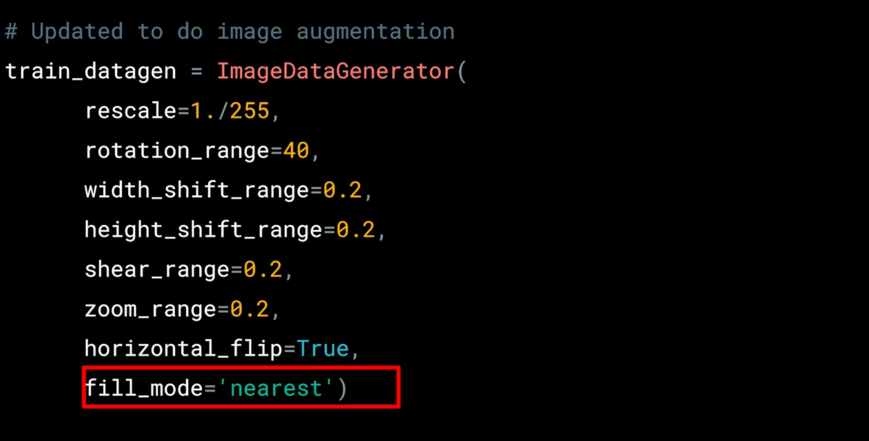

### Shear

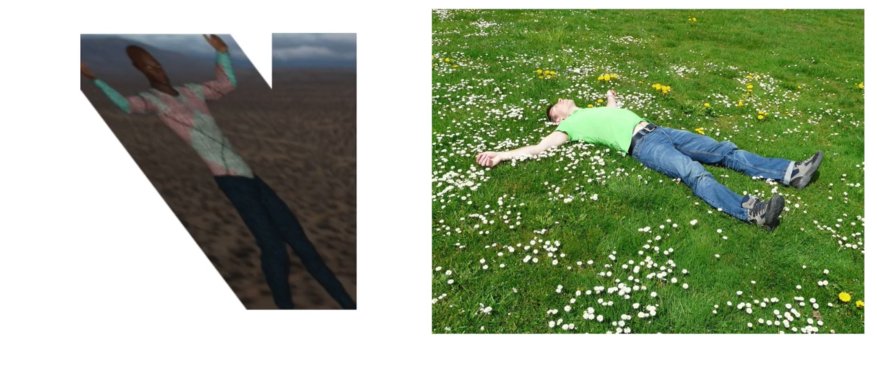

## Zoom

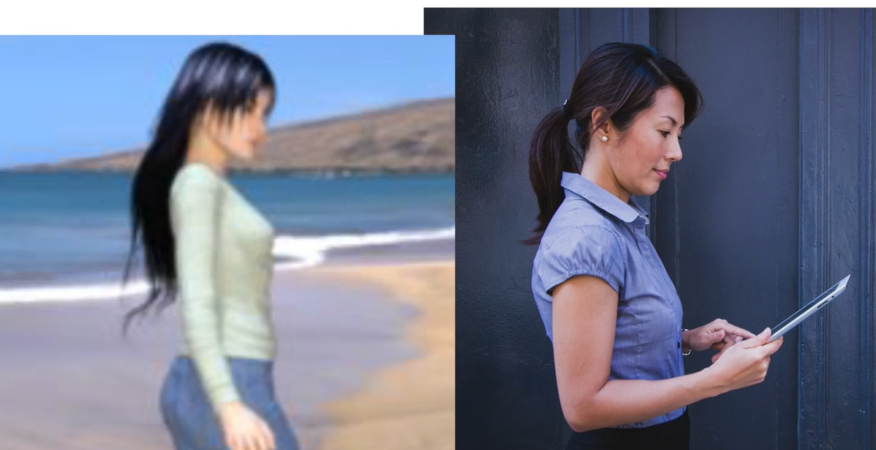

## Horizontal Flipping

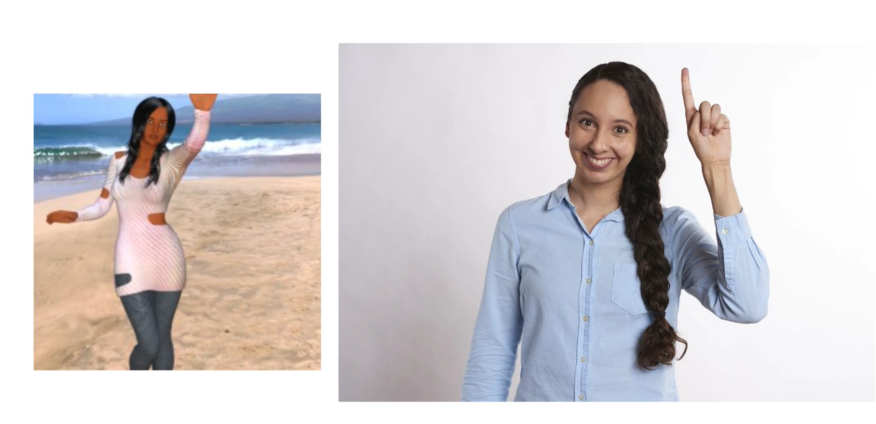

In [ ]:
# SECTION DIVIDER

## Data Augmentation Code

In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-09-14 12:12:29--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0d::cf
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   175MB/s    in 0.4s    

2023-09-14 12:12:29 (175 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os
import zipfile

zip_ref = zipfile.ZipFile("./cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])

  return model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
EPOCHS = 20

model = create_model()

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 144s - loss: 0.6912 - accuracy: 0.5075 - val_loss: 0.6833 - val_accuracy: 0.5090 - 144s/epoch - 1s/step
Epoch 2/20
100/100 - 118s - loss: 0.6718 - accuracy: 0.5800 - val_loss: 0.6705 - val_accuracy: 0.5560 - 118s/epoch - 1s/step
Epoch 3/20
100/100 - 110s - loss: 0.6542 - accuracy: 0.6125 - val_loss: 0.6334 - val_accuracy: 0.6250 - 110s/epoch - 1s/step
Epoch 4/20
100/100 - 116s - loss: 0.6268 - accuracy: 0.6545 - val_loss: 0.6096 - val_accuracy: 0.6710 - 116s/epoch - 1s/step
Epoch 5/20
100/100 - 122s - loss: 0.5923 - accuracy: 0.6820 - val_loss: 0.5874 - val_accuracy: 0.6900 - 122s/epoch - 1s/step
Epoch 6/20
100/100 - 113s - loss: 0.5716 - accuracy: 0.6955 - val_loss: 0.6040 - val_accuracy: 0.6760 - 113s/epoch - 1s/step
Epoch 7/20
100/100 - 116s - loss: 0.5457 - accuracy: 0.7140 - val_loss: 0.5776 - val_accuracy: 0.7010 - 116s/epoch - 1s/step
Epoch 8/20
100/100 - 115s - loss: 0.5347 - accuracy: 0.7195 - val_loss: 0.6018 - val_accuracy: 0.6710 - 115s/epoch - 1s/step


In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

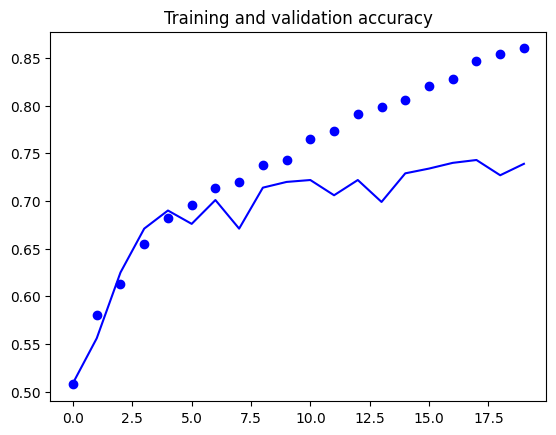

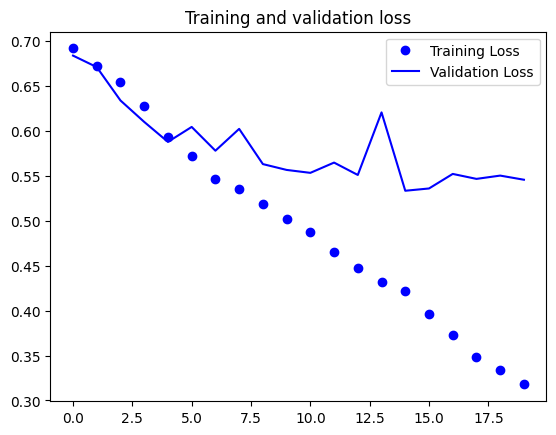

In [ ]:
# Plot training results
plot_loss_acc(history)

In [ ]:
# Data augmentation
model_for_aug = create_model()

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

In [ ]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)

NameError: ignored

In [ ]:
# SECTION DIVIDER

## Data Augmentation on the Horses or Humans Dataset Code

In [ ]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2023-09-14 12:22:19--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0b::cf, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip’

horse-or-human.zip  100%[===================>] 142.65M   107MB/s    in 1.3s    

2023-09-14 12:22:20 (107 MB/s) - ‘horse-or-human.zip’ saved [149574867/149574867]

--2023-09-14 12:22:20--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 2607:f8b0:4023:c0b::cf, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response..

In [ ]:
import os
import zipfile

zip_ref = zipfile.ZipFile('./horse-or-human.zip', 'r')
zip_ref.extractall('tmp/horse-or-human')

zip_ref = zipfile.ZipFile('./validation-horse-or-human.zip', 'r')
zip_ref.extractall('tmp/validation-horse-or-human')

zip_ref.close()

train_horse_dir = os.path.join('tmp/horse-or-human/horses')
train_human_dir = os.path.join('tmp/horse-or-human/humans')

validation_horse_dir = os.path.join('tmp/validation-horse-or-human/horses')
validation_human_dir = os.path.join('tmp/validation-horse-or-human/humans')

In [ ]:
import tensorflow as tf

# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
from tensorflow.keras.optimizers import RMSprop

# Set training parameters
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
        'tmp/horse-or-human/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=128,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        'tmp/validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [ ]:
# Constant for epochs
EPOCHS = 20

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=8,
      epochs=EPOCHS,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/20
8/8 [==============================] - 30s 4s/step - loss: 0.6893 - accuracy: 0.5284 - val_loss: 0.6988 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 25s 4s/step - loss: 0.6793 - accuracy: 0.5895 - val_loss: 0.6864 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 25s 3s/step - loss: 0.6749 - accuracy: 0.5873 - val_loss: 0.6898 - val_accuracy: 0.5000
Epoch 4/20
8/8 [==============================] - 26s 3s/step - loss: 0.6893 - accuracy: 0.6051 - val_loss: 0.6632 - val_accuracy: 0.5000
Epoch 5/20
8/8 [==============================] - 26s 3s/step - loss: 0.6545 - accuracy: 0.6563 - val_loss: 0.6697 - val_accuracy: 0.5039
Epoch 6/20
8/8 [==============================] - 26s 3s/step - loss: 0.6557 - accuracy: 0.6307 - val_loss: 0.6327 - val_accuracy: 0.9531
Epoch 7/20
8/8 [==============================] - 25s 3s/step - loss: 0.6303 - accuracy: 0.6763 - val_loss: 0.6528 - val_accuracy: 0.5078
Epoch 8/20
8/8 [==================

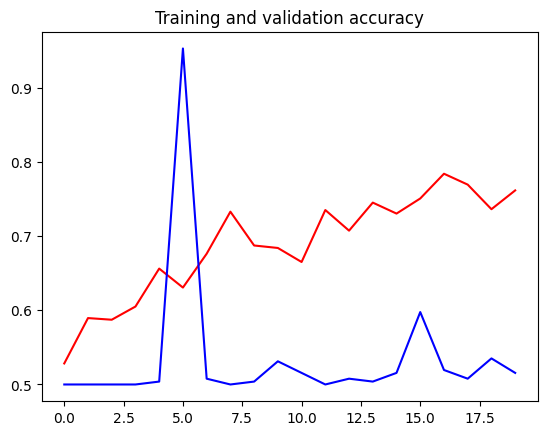

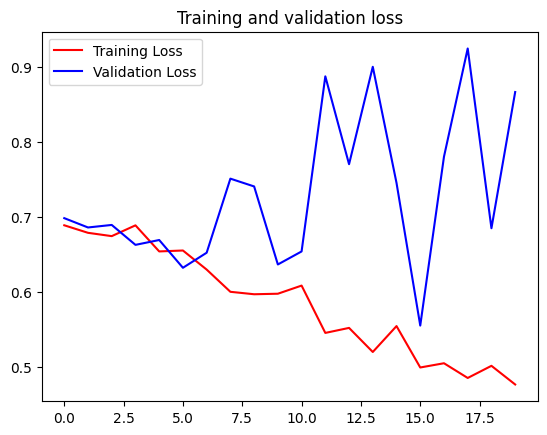

In [ ]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# SECTION DIVIDER

## Full Cats vs. Dogs using Augmentation